In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지 

%matplotlib inline

import seaborn as sns

from pandas_profiling import ProfileReport

import os

import warnings
warnings.filterwarnings('ignore')

#!git clone https://github.com/ADPclass/ADP_book_ver01.git
#for dirname, _, filenames in os.walk('ADP_book_ver01/data'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('datafiles/weatherAUS.csv')
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Cloud9am       88536 non-null   float64
 16  Cloud3pm       85099 non-null   float64
 17  Temp9am        141289 non-nul

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [7]:
# NA 1만개 이상 제외 
ser = df.isnull().sum() 
col_exc = list(ser[ser > 10000].index)
df = df.drop(col_exc, axis=1)

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp           637
MaxTemp           322
Rainfall         1406
WindGustDir      9330
WindGustSpeed    9270
WindDir3pm       3778
WindSpeed9am     1348
WindSpeed3pm     2630
Humidity9am      1774
Humidity3pm      3610
Temp9am           904
Temp3pm          2726
RainToday        1406
RainTomorrow        0
dtype: int64

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [10]:
# NA값이 있는 행 삭제 
df.dropna?

In [4]:
aus = df.dropna(axis=0, how='any')
#aus.isnull().sum() # --> 완료  
aus.shape

(71045, 21)

In [5]:
# 날짜 변환
aus['Date'] = pd.to_datetime(aus['Date'])

In [24]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128576 entries, 0 to 142192
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           128576 non-null  datetime64[ns]
 1   Location       128576 non-null  object        
 2   MinTemp        128576 non-null  float64       
 3   MaxTemp        128576 non-null  float64       
 4   Rainfall       128576 non-null  float64       
 5   WindGustDir    128576 non-null  object        
 6   WindGustSpeed  128576 non-null  float64       
 7   WindDir3pm     128576 non-null  object        
 8   WindSpeed9am   128576 non-null  float64       
 9   WindSpeed3pm   128576 non-null  float64       
 10  Humidity9am    128576 non-null  float64       
 11  Humidity3pm    128576 non-null  float64       
 12  Temp9am        128576 non-null  float64       
 13  Temp3pm        128576 non-null  float64       
 14  RainToday      128576 non-null  object        
 15  

In [6]:
# 범주형 변수 eda
cols_txt = aus.select_dtypes(include='object').columns

for col in cols_txt:
    print(col)
    print(pd.concat([aus[col].value_counts(),
                     aus[col].value_counts(normalize=True)], axis=1, keys=['count', 'pct']))
    print('='*50)

Location
                  count       pct
Darwin             3115  0.043845
Perth              3031  0.042663
Brisbane           3017  0.042466
MelbourneAirport   2933  0.041284
SydneyAirport      2925  0.041171
PerthAirport       2918  0.041073
NorfolkIsland      2782  0.039158
MountGambier       2743  0.038609
Watsonia           2734  0.038483
Mildura            2711  0.038159
Cairns             2650  0.037300
Townsville         2592  0.036484
WaggaWagga         2572  0.036202
Cobar              2465  0.034696
AliceSprings       2367  0.033317
Sale               2314  0.032571
Portland           2182  0.030713
Woomera            2180  0.030685
Moree              2169  0.030530
Nuriootpa          2065  0.029066
Hobart             1955  0.027518
CoffsHarbour       1947  0.027405
Melbourne          1899  0.026730
Sydney             1726  0.024294
Williamtown        1713  0.024111
Bendigo            1702  0.023957
Ballarat           1692  0.023816
Canberra           1612  0.022690
Pearc

In [7]:
# 수치형 변수 
cols_num = aus.select_dtypes(exclude='object').columns

aus[cols_num].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,71045.0,13.195977,6.447023,-6.7,8.3,12.9,18.1,31.4
MaxTemp,71045.0,23.843106,7.160639,4.1,18.2,23.4,29.3,48.1
Rainfall,71045.0,2.653144,9.495474,0.0,0.0,0.0,1.0,367.6
WindGustSpeed,71045.0,41.056316,13.371500,9.0,31.0,39.0,48.0,126.0
WindSpeed9am,71045.0,15.771595,8.308285,2.0,9.0,15.0,20.0,69.0
WindSpeed3pm,71045.0,19.765360,8.540903,2.0,13.0,19.0,26.0,76.0
Humidity9am,71045.0,67.082230,19.030765,0.0,55.0,68.0,81.0,100.0
Humidity3pm,71045.0,50.660412,20.929371,0.0,36.0,51.0,65.0,100.0
Pressure9am,71045.0,1017.193739,6.975855,980.5,1012.6,1017.1,1021.9,1040.4
Pressure3pm,71045.0,1014.810935,6.931394,977.1,1010.0,1014.7,1019.5,1038.9


In [8]:
# 데이터 7:3 분할 후 예측 모델 3개 이상 생성 

In [9]:
# X데이터 컬럼만 더미처리 
for col in cols_txt[:-1]:
    aus = pd.concat([aus, 
                     pd.get_dummies(aus[col], prefix=col)], axis=1)
aus.drop(cols_txt[:-1], axis=1, inplace=True)
#np.sort(aus.columns)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링시 Date는 제외
X = aus.drop(['RainTomorrow', 'Date'], axis=1)
y = aus['RainTomorrow']

# 스케일러
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

# 분할 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=6789)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49731, 98) (21314, 98) (49731,) (21314,)


In [11]:
X_train.tail(3)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
17350,0.291339,0.170455,0.03482,0.179487,0.104478,0.243243,0.85,0.72,0.654424,0.700647,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
46848,0.832021,0.613636,0.00000,0.239316,0.074627,0.297297,0.87,0.70,0.312187,0.309061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42177,0.511811,0.504545,0.00000,0.128205,0.059701,0.148649,0.63,0.50,0.656093,0.601942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#X_train.info()

In [31]:
# 모델 1 : + 계수해석 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(sum(y_test==pred) / len(y_test))

0.8487848362578587


In [32]:
# 모델 2 --> 겁나 느림 ㅠ.ㅜ 
#from sklearn.svm import SVC

#sv = SVC()
#sv.fit(X_train, y_train)
#pred = sv.predict(X_test)
#print(sum(y_test==pred) / len(y_test))

In [33]:
# 모델 : 트리 + 트리해석 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)  #트리는 max_depth 반드시 지정
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(sum(y_test==pred)/len(y_test))

0.8408088580275875


In [35]:
# 모델 3 + 변수중요도
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(sum(y_test==pred) / len(y_test))

0.8535235056770198


In [25]:
# 성능 평가 
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     16268
         Yes       0.78      0.53      0.63      5046

    accuracy                           0.85     21314
   macro avg       0.82      0.74      0.77     21314
weighted avg       0.85      0.85      0.84     21314



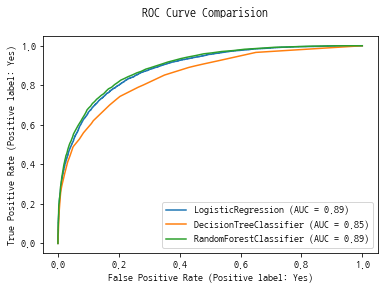

In [36]:
from sklearn.metrics import plot_roc_curve, roc_auc_score   # yellowbrick 추가 

lr_roc = plot_roc_curve(lr, X_test, y_test)
dt_roc = plot_roc_curve(dt, X_test, y_test, ax=lr_roc.ax_)
rf_roc = plot_roc_curve(rf, X_test, y_test, ax=lr_roc.ax_)

rf_roc.figure_.suptitle("ROC Curve Comparision")
plt.show()

### 시간이 남으면 추가로 할 것
- 해석 : 로지스틱 변수설명, 트리 해석, 랜덤포레스트 변수 중요도 
- k-fold 교차검증 
- 오버샘플링 
- 파생변수 생성 
- 피처 엔지니어링
- EDA 시각화 등 

---
### 통계분석

In [37]:
bike = pd.read_csv('datafiles/bike_marketing.csv')
print(bike.info())
bike.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company_num      172 non-null    int64  
 1   google_adwords   172 non-null    float64
 2   facebook         172 non-null    float64
 3   twitter          172 non-null    float64
 4   marketing_total  172 non-null    int64  
 5   revenues         172 non-null    float64
 6   employees        172 non-null    int64  
 7   pop_density      172 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.9+ KB
None


,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
169,170,59.86,12.76,21.66,94,36.96,4,Low
170,171,117.91,16.01,18.01,152,41.11,7,Low
171,172,308.78,54.58,77.58,441,58.38,10,Medium


In [39]:
# bike.isnull().sum() --> 결측없음

In [40]:
# pop_density별 revenue 차이 분석 (ANOVA)
bike['pop_density'].value_counts()

Low       68
High      52
Medium    52
Name: pop_density, dtype: int64

In [45]:
# 정규성 검정 
import scipy.stats as stats

low = bike.query(" pop_density == 'Low'")['revenues']
high = bike.query(" pop_density == 'High'")['revenues']
medium = bike.query(" pop_density == 'Medium'")['revenues']

stats.levene(low, high, medium)  # 정규성 검정 귀무가설 채택 

LeveneResult(statistic=1.3018605034247601, pvalue=0.2747390092674645)

In [46]:
stats.f_oneway(low, high, medium) # 분산분석 : 평균차이 없음 

F_onewayResult(statistic=0.6099442141289079, pvalue=0.544572945313452)

             count       mean       std    min      25%     50%      75%  \
pop_density                                                                
High          52.0  44.877692  5.324741  36.59  40.9825  44.545  47.2100   
Low           68.0  44.013529  6.095934  30.45  40.4200  43.570  47.0525   
Medium        52.0  45.125385  6.015655  35.43  39.7675  44.470  50.5700   

               max  
pop_density         
High         58.30  
Low          58.17  
Medium       58.38  


<AxesSubplot:xlabel='pop_density', ylabel='revenues'>

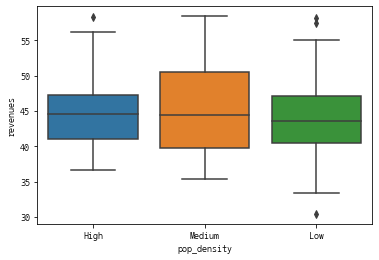

In [49]:
print(bike.groupby('pop_density')['revenues'].describe())
sns.boxplot(x='pop_density', y='revenues', data=bike)

### 회귀분석
- 단계적선택법은 파이썬, 전진/후진선택법은 R에서 해보기 

In [75]:
# 단계선택법 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor 

formula = "revenues ~ google_adwords + facebook + twitter + marketing_total + employees"    
y, X = dmatrices(formula, data=bike, return_type='dataframe')

In [76]:
X.head(1)

,Intercept,google_adwords,facebook,twitter,marketing_total,employees
0,1.0,65.66,47.86,52.46,166.0,5.0


In [77]:
X.iloc[:,1:].corr()

,google_adwords,facebook,twitter,marketing_total,employees
google_adwords,1.000000,0.076432,0.098975,0.947289,0.661031
facebook,0.076432,1.000000,0.354341,0.310304,0.410197
twitter,0.098975,0.354341,1.000000,0.376064,0.229062
marketing_total,0.947289,0.310304,0.376064,1.000000,0.720843
employees,0.661031,0.410197,0.229062,0.720843,1.000000


In [78]:
# VIP 검증 : 10이상시 다중공선성 존재 
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['VIF', 'Variable'])  

,VIF,Variable
0,95943.197321,google_adwords
1,2929.810283,facebook
2,6058.485476,twitter
3,115182.138083,marketing_total
4,2.336456,employees


VIF가 너무 크게 나옴 ㅠ.ㅜ 

In [82]:
# Full model 
import statsmodels.api as sm 
import statsmodels.formula.api as smf

model = smf.ols(formula, data=bike)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.57e-72
Time:                        04:11:47   Log-Likelihood:                -369.26
No. Observations:                 172   AIC:                             750.5
Df Residuals:                     166   BIC:                             769.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.4433      0.596     47.706      0.000      27.266      29.621
google_adwords      1.2110      0.571      2.122      0.035       0.084       2.338
facebook            1.3464      0.571      2.356      0.020       0.218       2.474
twitter             1.1724      0.571      2.052      0.042       0.045       2.300
marketing_total    -1.1696      0.571     -2.049      0.042      -2.297      -0.043
employees           0.3865      0.104      3.708      0.000       0.181       0.592
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.974
Skew:                          -0.341   Prob(JB):                        0.137
Kurtosis:                       2.702   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# 변수선택법 : 소스코드는 맨 하단 참조
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  5 models on 1 predictors in
Selected predictors: ['marketing_total', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e17a0ea90>
forward
Processed  1 models on 0 predictors in 0.00498652458190918
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e17aa0e80>
Processed  4 models on 2 predictors in
Selected predictors: ['marketing_total', 'facebook', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e17a0edc0>
forward
Processed  2 models on 1 predictors in 0.007058143615722656
Selected predictors: ['marketing_total', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3e17a0ee80>
Processed  3 models on 3 predictors in
Selected predictors: ['marketing_total', 'facebook', 'google_adwords', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7

In [85]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     375.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           3.41e-74
Time:                        04:15:02   Log-Likelihood:                -371.44
No. Observations:                 172   AIC:                             750.9
Df Residuals:                     168   BIC:                             763.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
facebook           0.1768      0.012     14.548      0.000       0.153       0.201
google_adwords     0.0415      0.003     16.090      0.000       0.036       0.047
employees          0.4066      0.104      3.898      0.000       0.201       0.612
Intercept         28.3751      0.584     48.601      0.000      27.222      29.528
==============================================================================
Omnibus:                        3.324   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                3.340
Skew:                          -0.306   Prob(JB):                        0.188
Kurtosis:                       2.696   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

잔차분석 

In [86]:
# 더빈왓슨 독립성 검정 : 2이면 독립성, 0에 가까울수록 양의 상관, 4에 가까울수록 음의 상관 
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html
# https://www.statology.org/durbin-watson-test-python/ 

from statsmodels.stats.stattools import durbin_watson

pred = stepwise_best_model.predict()   # numpy 
resid = stepwise_best_model.resid     # Series 

durbin_watson(resid) # 2에 가깝기 떄문에 독립성 검정 

2.1013277351950252

In [87]:
# 정규성 
from scipy.stats import shapiro

shapiro(resid)  # 정규성 만족

ShapiroResult(statistic=0.9883638024330139, pvalue=0.16835027933120728)

In [ ]:
# 등분산 : 잔차 분포

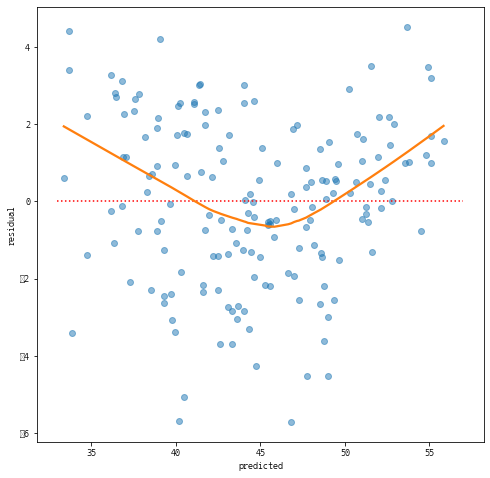

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(pred, resid, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'C1'},
            lowess=True)
ax.set_xlabel('predicted')
ax.set_ylabel('residual')
plt.hlines(y=0, xmin=33, xmax=57, color='red', linestyles='dotted');  # 코딩하는데 오래걸림 ㅠ.ㅜ

그래프 기울기를 나타내는 빨간색 선이 포물선 성향을 띄고 있기 때문에 잔차는 평규인 0을 중심으로 고르게 분포한다고 판단하기 힘들다. 

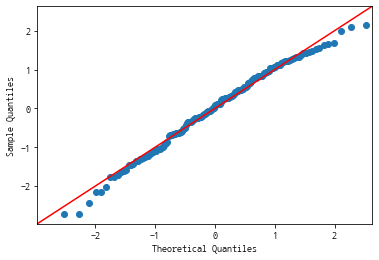

In [96]:
# QQPlot (정규성 가정 )
import scipy.stats as stats

fig = sm.qqplot(resid,  fit=True, line='45') 

오늘쪽 위를 향하는 45도 각도 직선위에 그래프 점들이 주로 위치한 것으로 보아 정규성 만족한다고 볼 수 있다.

eval_env: 1


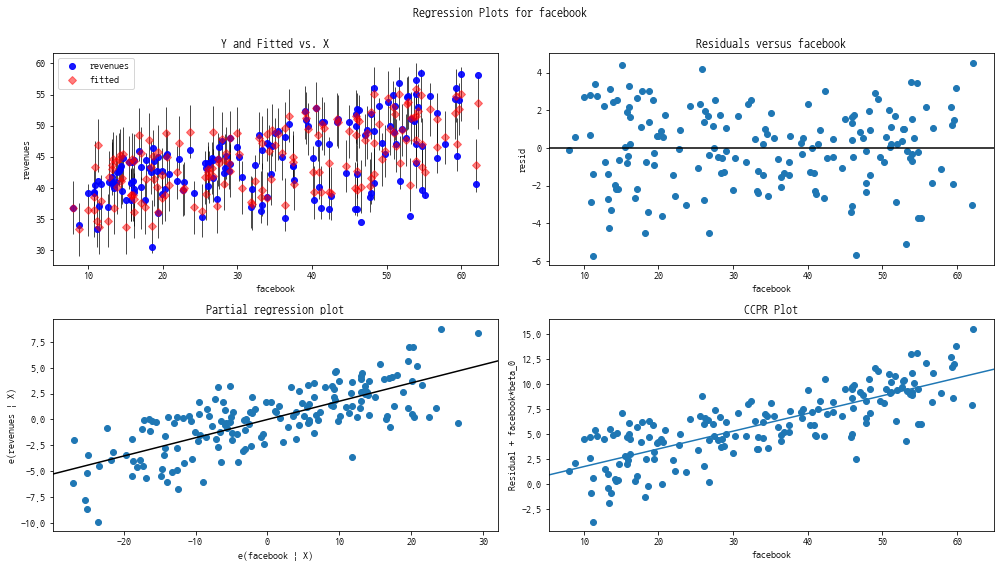

In [98]:
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(stepwise_best_model, 'facebook', fig=fig)  # 독립변수 한개씩만 됨. QQ플롯 없음 

eval_env: 1


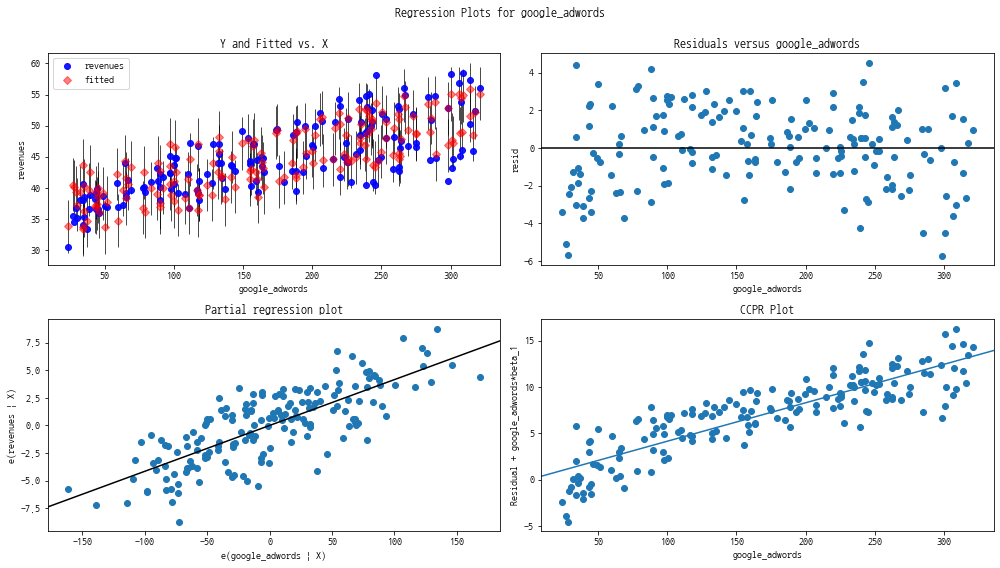

In [99]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(stepwise_best_model, 'google_adwords', fig=fig)  # 독립변수 한개씩만 됨. QQ플롯 없음 

eval_env: 1


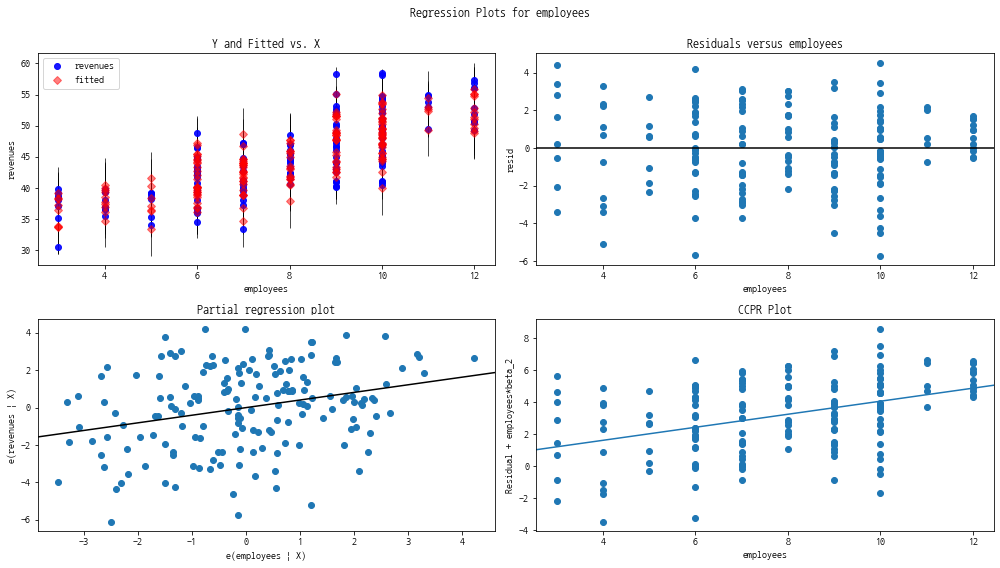

In [100]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(stepwise_best_model, 'employees', fig=fig)  # 독립변수 한개씩만 됨. QQ플롯 없음 

해석하는법 : 꽃개 책에서 ... 

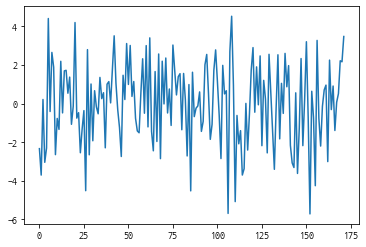

In [97]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y).flatten() - pred,label="predFull")

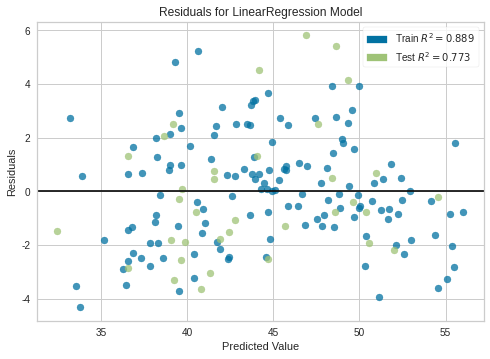

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [109]:
# yellowbrick (사이킷런 기반)  ---> QQ plot이 안그려짐 ㅠ.ㅜ 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()

#visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [110]:
bike.to_csv('bike_for_r.csv', index=False)

In [ ]:
"""
getwd()   # R 작업 공간  
bike <- read.csv('bike_for_r.csv') 
tail(bike)

# full model 
bike.lm <- lm(revenues ~ google_adwords + facebook + twitter + marketing_total  + employees, data=bike)
summary(bike.lm)

# 단계선택법 (변수선택 과정을 보여준다)
formula_low <- lm(revenues~1, data=bike)
formula_up <- lm(revenues~google_adwords+facebook+twitter+marketing_total+employees, data=bike)
step(formula_low, scope=list(upper=formula_up), direction='forward')

# 단계선택법 (선택과정 생략하고, 결과 한번에 보기)
step(lm(revenues~google_adwords+facebook+twitter+marketing_total+employees, data=bike), direct='both')
step(lm(revenues~google_adwords+facebook+twitter+marketing_total+employees, data=bike), direct='forward')
step(lm(revenues~google_adwords+facebook+twitter+marketing_total+employees, data=bike), direct='backward')
# --> 분석결과 어떠한 변수도 제거되지 않음 

# 잔차분석 
# 독립성 검정 : 더빈왓슨 
library(lmtest)
dwtest(bike.lm)

# 정규성 검정 
shapiro.test(resid(bike.lm))

# 등분산성, 정규성 
par(mfrow=c(2,2))
plot(bike.lm)

"""

In [ ]:
https://wikidocs.net/92961

사용자 사전을 추가하는 방법은 형태소 분석기마다 다른데, 생각보다 복잡한 경우들이 많습니다. 
이번 실습에서는 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용합니다.

pip install customized_konlpy

In [83]:
#############################
# 회귀분석 변수선택법 코드 
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

import time
import itertools


def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model	


def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
    	Forward_result = forward(X=X,y=y,predictors=predictors)
    	if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
    	Fmodels.loc[i] = Forward_result
    	predictors = Fmodels.loc[i]["model"].model.exog_names
    	Fmodel_before = Fmodels.loc[i]["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
    

	
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model	


def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
    	Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
    	if Backward_result['AIC'] > Bmodel_before :
        	break
    	Bmodels.loc[len(predictors) -1] = Backward_result
    	predictors = Bmodel.loc[len(predictors) - 1]['model'].model.exog_names
    	Bmodel_before = Backward_result["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])



# 단계적 선택법
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])	